##### Here we'll handling a real data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

we shart by loading the Data

In [ ]:
df = pd.read_csv('House_price.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# loooking at the EDD
df.describe()

In [ ]:
df.info()

In [ ]:
sns.jointplot(x='n_hot_rooms', y='price', data=df)

In [ ]:
sns.jointplot(x="rainfall", y="price", data=df)

In [ ]:
df.head()

In [ ]:
sns.countplot(x="airport", data=df)

In [ ]:
sns.countplot(x="waterbody", data = df)

In [ ]:
sns.countplot(x="bus_ter", data=df)

### Observations
1. Missing values in n_hos_beds
2. Skewness or outliers in crime rate
3. Outliers in n_hot_rooms and rainfall
4. Bus_ter has only 'Yes' values

# Missing Value Imputation
Real-world data often has missing values. Data can have missing values for a number of reasons such as observations
that were not recorded and data corruption.
#### Impact
- Handling missing data is important as many machine learning algorithms do
not support data with missing values.
#### Solution
- Remove rows with missing data from your dataset.
- Impute missing values with mean/median values in your dataset.
#### Note
- Use business knowledge to take separate approach for each variable
- It is advisable to impute instead of remove in case of small sample size or
large proportion of observations with missing values

### Methods

1. Impute with ZERO
    - Impute missing values with zero
2. Impute with Median/Mean/Mode
    - For numerical variables, impute missing values with Mean or Median
    - For categorical variables, impute missing values with Mode
3. Segment based imputation
    - Identify relevant segments
    - Calculate mean/median/mode of segments
    - Impute the missing value according to the segments
    - For example, we can say rainfall hardly varies for cities in a particularState
    - In this case, we can impute missing rainfall value of a city with theaverage of that state

In [ ]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [ ]:
df.info()

# Outlier Treatment
Outlier is a commonly used terminology by analysts and data scientists, Outlier is an observation that appears far away
and diverges from an overall pattern in a sample.

#### Reasons
- Data Entry Errors
- Measurement Error
- Sampling error etc
#### Impact
- It increases the error variance and reduces the power of statistical tests
#### Solution
- Detect outliers using EDD and visualization methods such as scatter plot, histogram or box plots
- Impute outliers

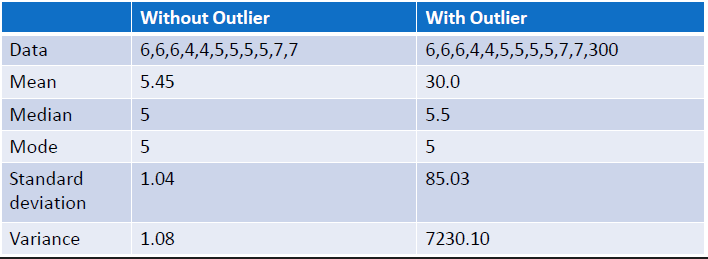

### Outlier Treatment Methods


1. Capping and Flooring 
    - Impute all the values above 3* P99 and below 0.3*P1 
    - Impute with values 3* P99 and 0.3*P1 
    - You can use any multiplier instead of 3, as per your business 
requirement 
2. Exponential smoothing 
    - Extrapolate curve between P95 to P99 and cap all the values falling 
outside to the value generated by the curve 
    - Similarly, extrapolate curve between P5 and P1 
3. Sigma Approach 
    - Identify outliers by capturing all the values falling outside 𝝁 ∓ 𝔁𝝈
    - You can use any multiplier as x, as per your business requirement

In [ ]:
np.percentile(df.n_hot_rooms,[99])

In [ ]:
np.percentile(df.n_hot_rooms,[99])[0]

In [ ]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [ ]:
df[(df.n_hot_rooms>uv)]

In [ ]:
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv

In [ ]:
np.percentile(df.rainfall,[1])[0]

In [ ]:
lv = np.percentile(df.rainfall,[1])[0]

In [ ]:
df[(df.rainfall< lv)]

In [ ]:
df.rainfall[(df.rainfall <0.3*lv)] = 0.3*lv

# Seasonality

Seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly,
monthly, or quarterly.


### Reasons
- Weather,
- Vacation,
- Holidays
### Examples
- Ice cream sales
- Christmas sales
#### Solution
- Calculate multiplication factor for each month as 𝓂 = 𝜇𝑌𝑒𝑎𝑟 ÷ 𝜇𝑀𝑜𝑛𝑡ℎ
- Multiply each observation with its multiplication factor

# Non Usable Variables
Identify the non usable variables to reduce the dimension of your dataset
1. Variables with single unique value
2. Variables with low fill rate
3. Variables with regulatory issue
4. Variable with no business sense

In [ ]:
df.bus_ter.unique().tolist()

In [ ]:
sns.countplot(x =df.bus_ter)

## Deleting a column
Deleting a column from a dataset is a common operation in data analysis and manipulation tasks. When you delete a column, you remove it from the dataset, resulting in a modified dataset with one fewer column. Here's a short note on deleting a column:

#### Process: 
To delete a column from a dataset, you need to identify the column you want to remove and use the appropriate method or function provided by the data manipulation library you are using. In Python, the popular pandas library provides the drop() function to delete columns from a DataFrame.

Syntax: The general syntax to delete a column named 'column_name' from a DataFrame 'df' using the `drop()` function is:

In [ ]:
df = df.drop('bus_ter', axis=1)

In [ ]:
df.head()

## Bivariate Analysis
Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

#### Scatter Plot
- Scatter indicates the type (linear or non-linear) and strength of the relationship between two variables
- We will use Scatter plot to transform variables

#### Type of Linearity
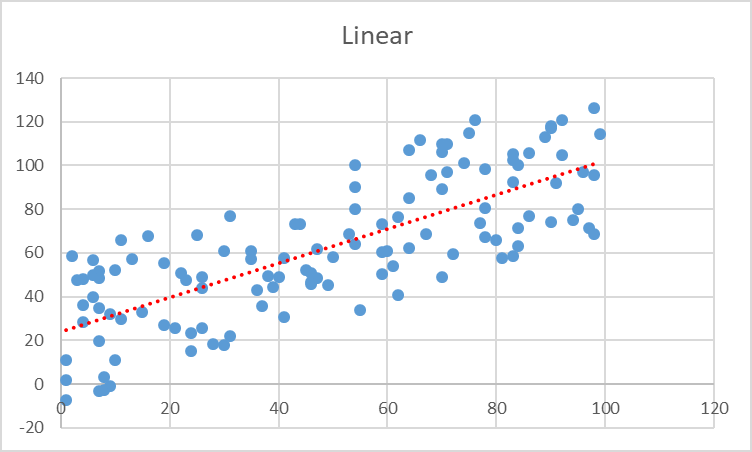
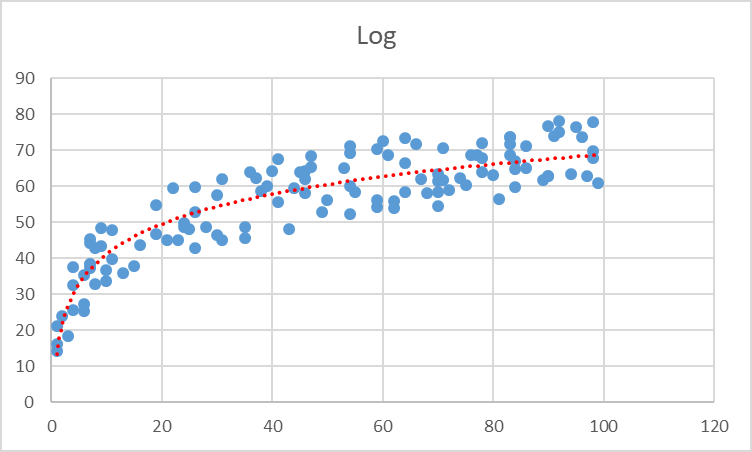
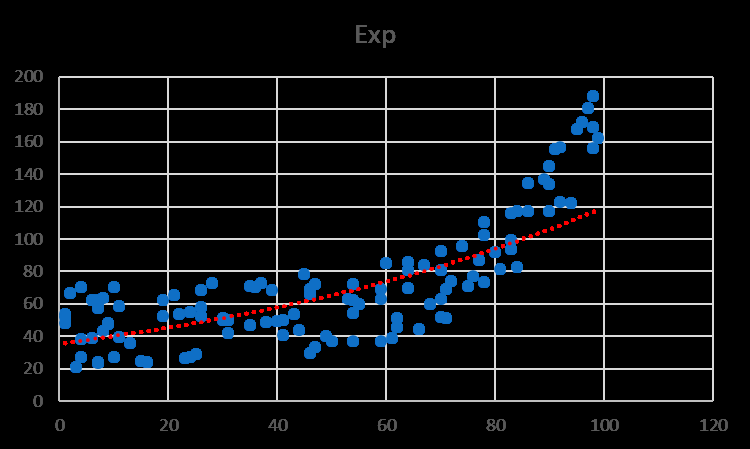
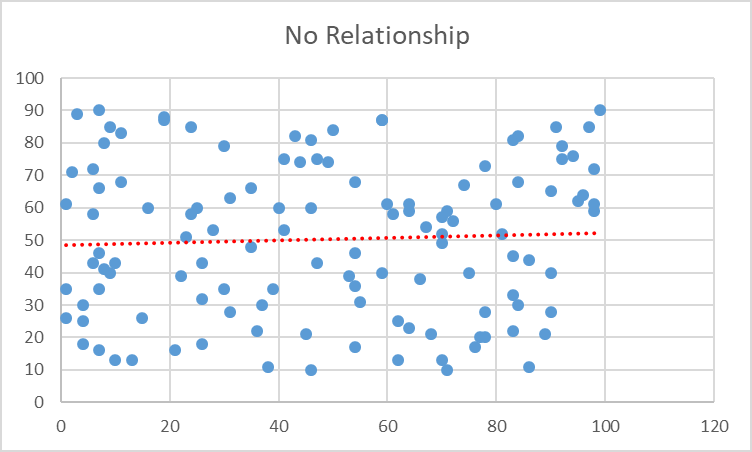

## Skewed data
Skewed data refers to a situation where the distribution of values in a dataset is asymmetric, deviating from the normal or bell-shaped distribution. Skewness can occur in either the positive or negative direction, resulting in a long tail on one side of the distribution. Skewed data can have implications for statistical analysis and modeling, as it can affect the accuracy of assumptions made by certain methods.

#### Type
There are two common types of skewness:

- **Positive skewness**: In this case, the tail of the distribution extends towards the right side, indicating a larger number of smaller values and a few extremely large values.

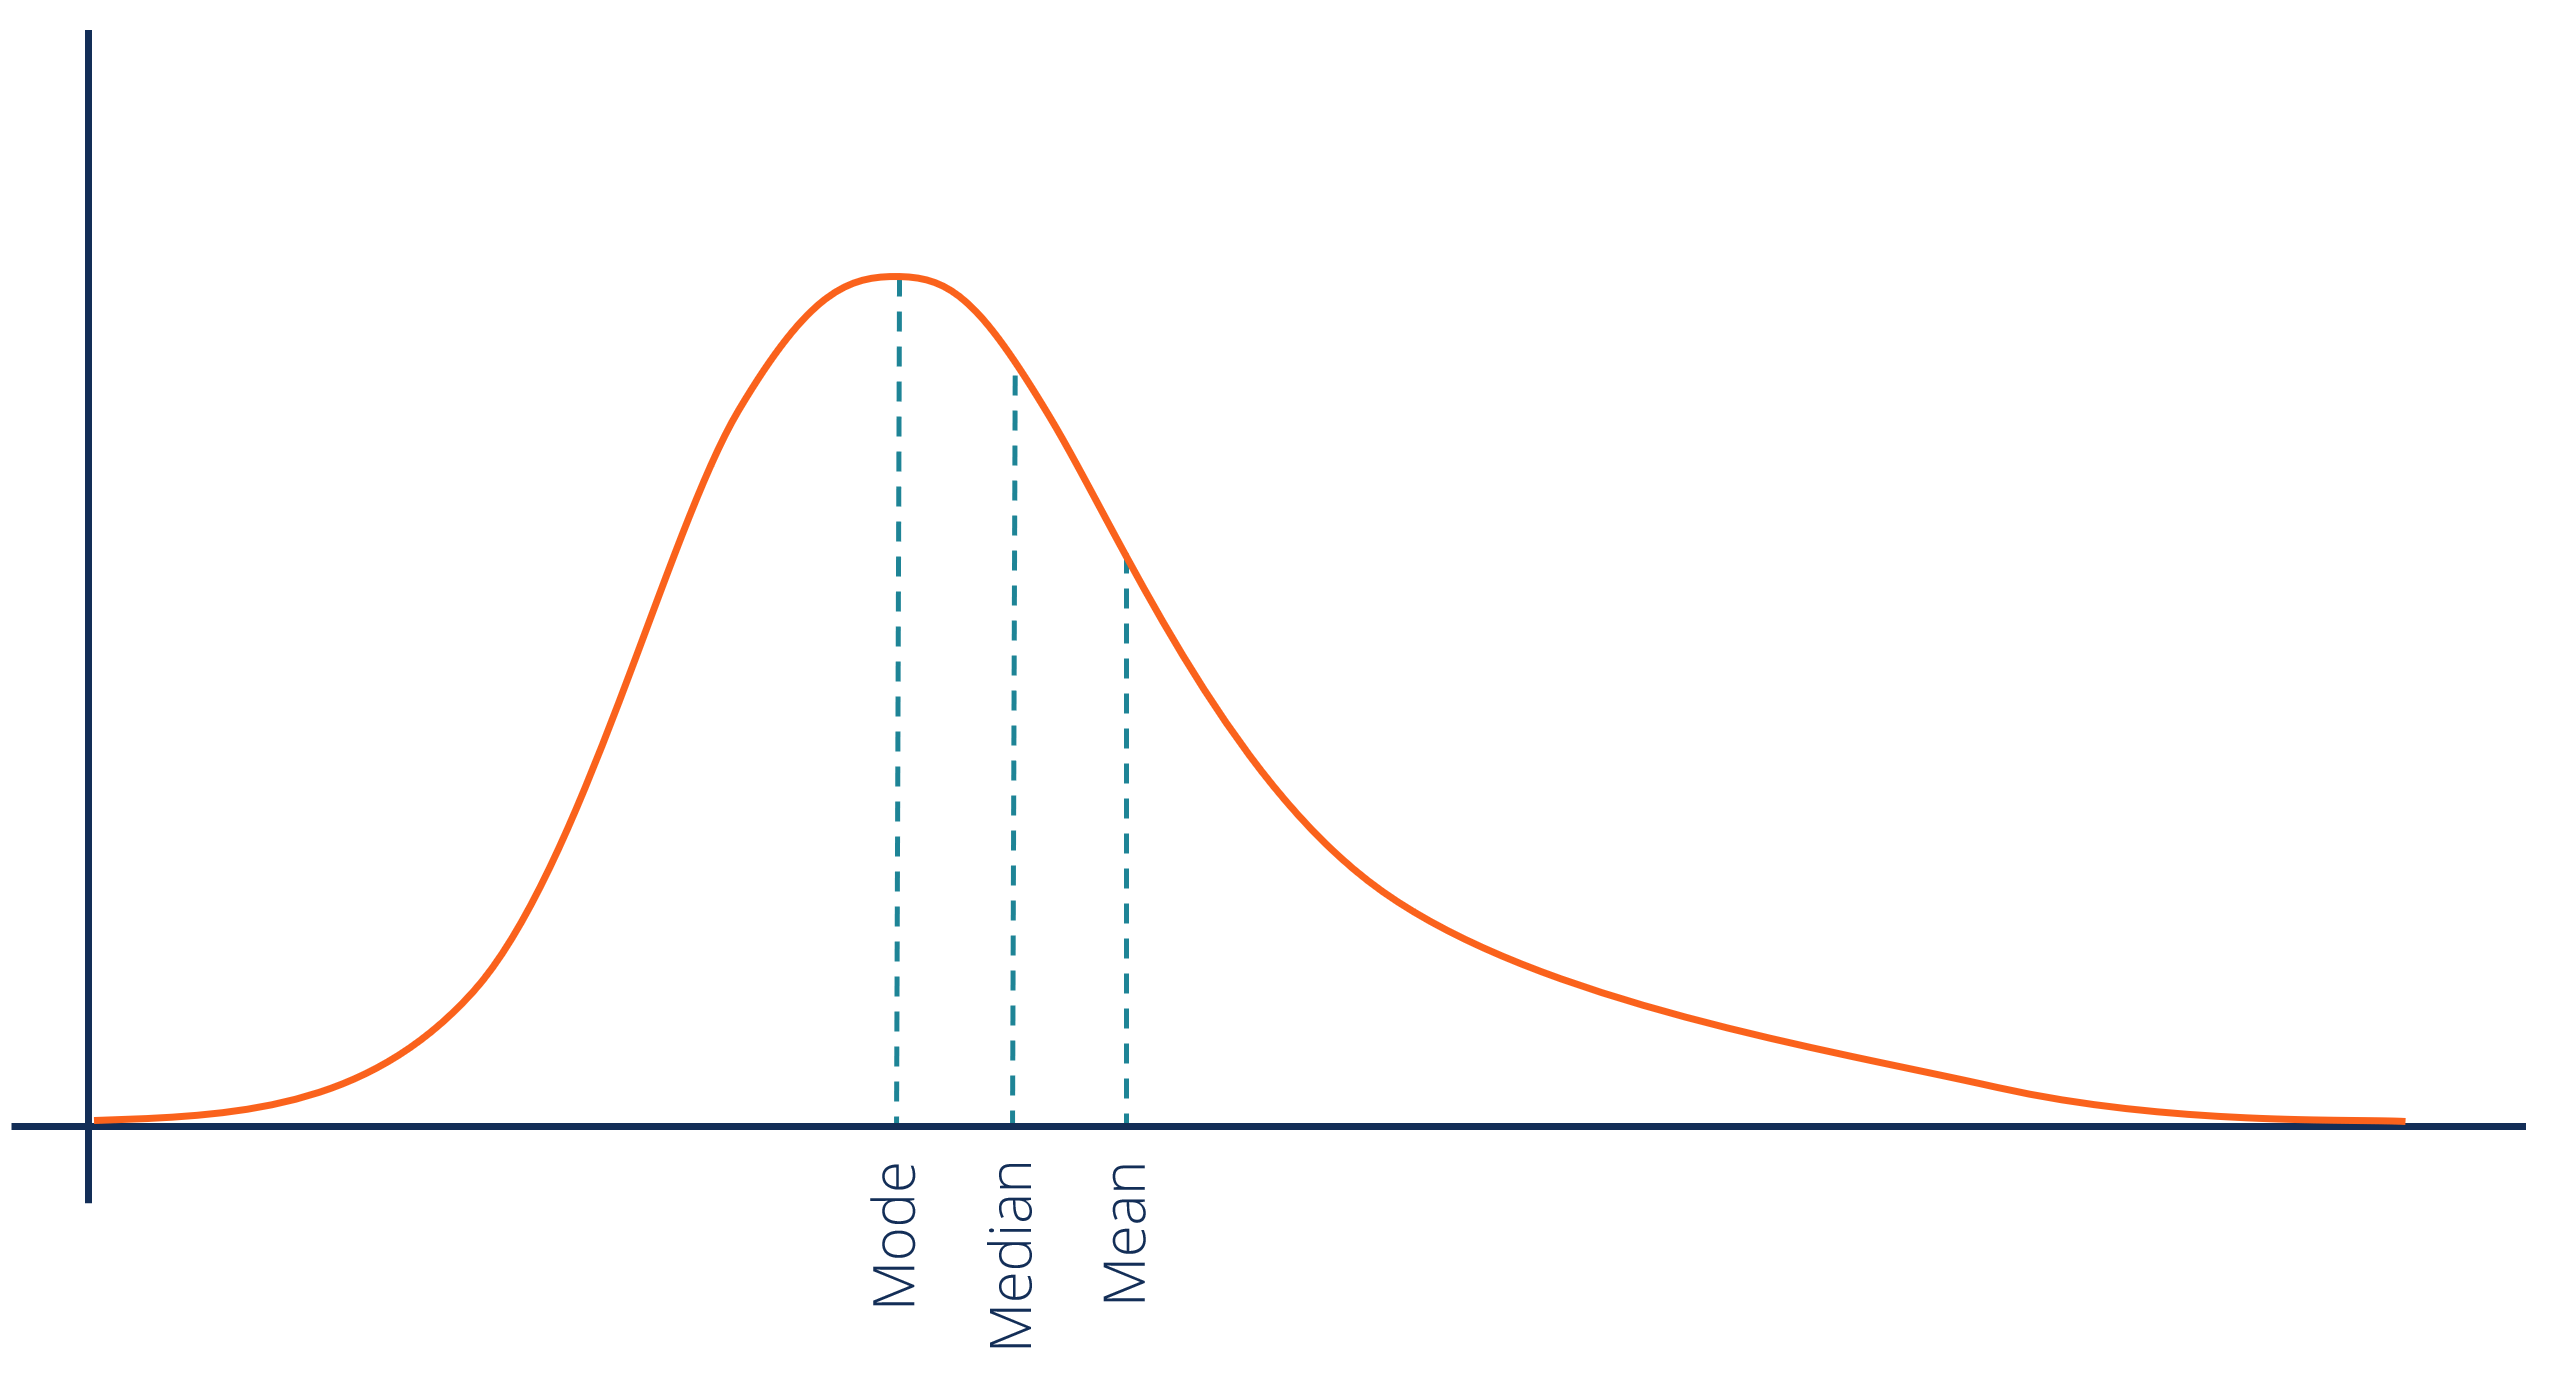

- **Negative skewness**: Here, the tail of the distribution extends towards the left side, indicating a larger number of larger values and a few extremely small values.

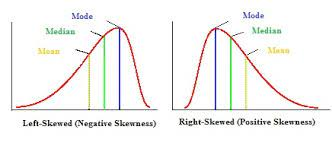

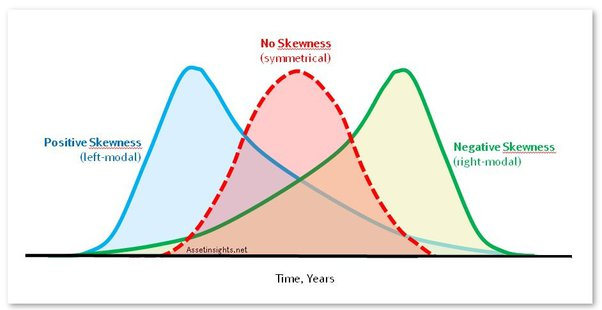

Handling skewed data is important because it can affect the performance of certain models and statistical tests that assume a normal distribution. Here are some common methods to handle skewed data:

1. Logarithmic transformation: Applying a logarithmic transformation to the skewed variable can compress the larger values and spread out the smaller values, reducing the skewness and making the distribution more symmetrical.

2. Square root transformation: Similar to the logarithmic transformation, the square root transformation can help reduce the skewness of the data.

3. Box-Cox transformation: The Box-Cox transformation is a more general transformation that can handle various types of skewness. It applies a power transformation to the data, allowing it to become more normally distributed.

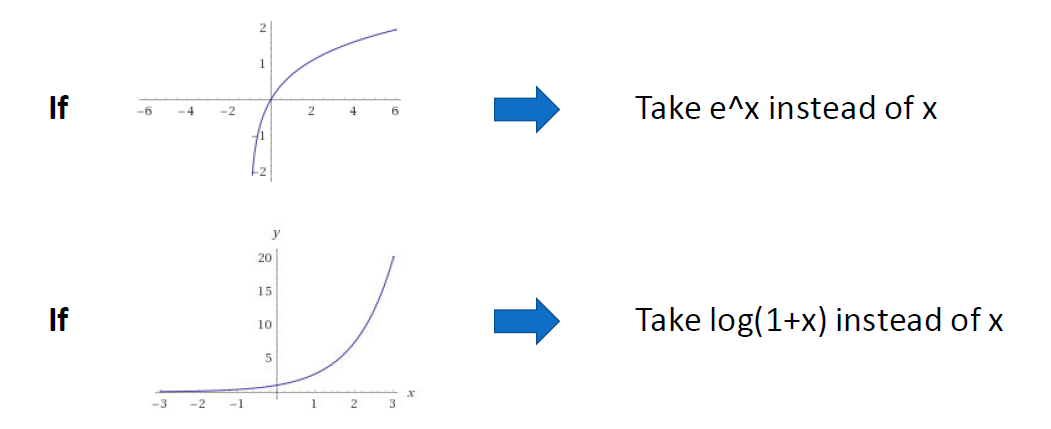
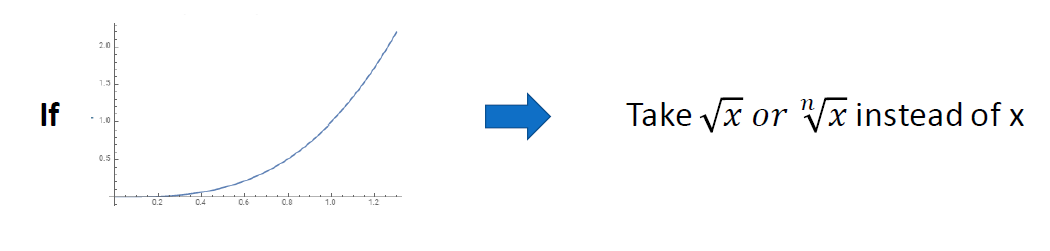

In [ ]:
sns.distplot(x =df.price,  hist=True, kde=True)

In [ ]:
sns.scatterplot(x="crime_rate", y="price", data=df)

In [ ]:
df.crime_rate.describe()

In [ ]:
np.log(df.crime_rate).describe()

In [ ]:
np.log(1+ df.crime_rate).describe()

In [ ]:
np.sqrt(df.crime_rate).describe()

In [ ]:
from scipy.stats import boxcox
pd.Series(boxcox(df['crime_rate'])[0].tolist()).describe()

In [ ]:
sns.distplot(x =df.crime_rate,  hist=True, kde=True)

In [ ]:
df.crime_rate = np.log(1+df.crime_rate)

In [ ]:
sns.distplot(x =df.crime_rate,  hist=True, kde=True)

In [ ]:
sns.scatterplot(x="crime_rate", y="price",data=df)

# 🥳🥳CONGRATULATIONS🥂🎊🎉
 you have successfully cleaned the data.

## Handling categorical columns
Handling categorical columns is an important task in data analysis and modeling as categorical variables contain non-numerical values that require special treatment. Categorical variables provide valuable information about the different groups or categories in a dataset. Here's a note on handling categorical columns:

#### Types of Categorical Variables
Categorical variables can be classified into two main types:
1. Nominal Variables: These variables have categories with no inherent order or ranking. Examples include gender (male, female) or city (Abuja, Lagos, Benin).
2. Ordinal Variables: These variables have categories with a specific order or ranking. Examples include educational level (high school, college, graduate school) or satisfaction level (low, medium, high).

### Data Encoding:
 Categorical variables need to be encoded into numerical values for analysis or modeling. Some common encoding techniques include:
1. One-Hot Encoding: This technique creates binary columns for each category, representing the presence or absence of the category in each observation.

In [ ]:
encoded_df = pd.get_dummies(df)
encoded_df.head()

In [ ]:
encoded_df.shape,df.shape

2. Ordinal Encoding: This technique assigns a unique integer value to each category, preserving the ordinal relationship among categories. It is suitable when the categories have an inherent order or rank.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Manually specify the order mapping
order_mapping = [['None','River', 'Lake', 'Lake and River']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['waterbody']])
df['waterbody_Encoded'] = encoded_data

In [ ]:
df.waterbody.unique().tolist()

In [ ]:
df.head()

3. Label Encoding: Similar to ordinal encoding, label encoding assigns a unique integer value to each category, but it does not preserve any inherent order. It is suitable when the categories are unordered.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['airport'])
df['airport'] = encoded_data

In [ ]:
df.head()

In [ ]:
df = df.drop("waterbody" , axis= 1)

In [ ]:
df.head()

In [ ]:
df.info()

## Correlation
Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

#### Examples
Some examples of data that have a high correlation:
- Your caloric intake and your weight.
- The amount of time your study and your GPA.

Some examples of data that have a low correlation (or none at all):
- A persons name and the chances of them commiting violence
- The colour of a house and how much the building cost

## The Correlation Coefficient
### Definition
- A correlation coefficient is a way to put a value to the relationship.
- Correlation coefficients have a value of between -1 and 1.
- A “0” means there is no relationship between the variables at all,
- While -1 or 1 means that there is a perfect negative or positive correlation

#### Examples
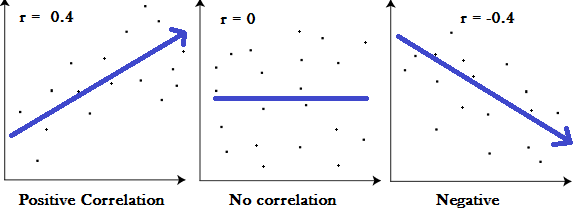

## The Correlation Matrix
#### Definition
- A correlation matrix is a table showing correlation coefficients between variables.
- Each cell in the table shows the correlation between two variables.
- A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

# example
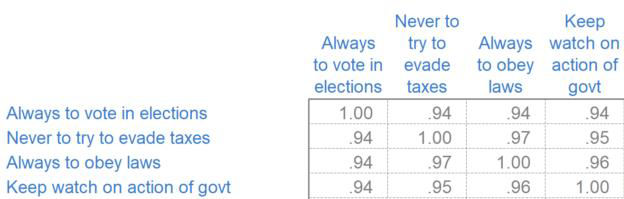

## Application
- To summarize a large amount of data where the goal is to see patterns.
- To Identify collinearity in the data

### Multicollinearity
#### Definition
- Multicollinearity exists whenever two or more of the predictors in a regression
model are moderately or highly correlated.
#### Effects
- Multicollinearity results in a change in the signs as well as in the magnitudes of the partial regression coefficients from one sample to another sample.
- Multicollinearity makes it tedious to assess the relative importance of the independent variables in explaining the variation caused by the dependent variable.
#### Solution
- Remove highly correlated independent variables by looking at the correlation matrix and VIF

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

In [ ]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [ ]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

In [ ]:
df.head()

In [ ]:
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

In [ ]:
del df['parks']

In [ ]:
df.head()

# REGRESSION
Regression analysis is a statistical modeling technique used to explore the relationship between a dependent variable and one or more independent variables. Linear regression is a specific type of regression analysis that assumes a linear relationship between the variables. Here's a short note on linear regression, starting with univariate analysis before considering multiple linear regression:

## Linear Regression:

Linear regression aims to model the relationship between a dependent variable (response variable) and one independent variable (predictor variable) through a linear equation of the form 
$$Y = wx + b,$$ 
where Y represents the dependent variable, 

<i>X represents the independent variable,

b is the y-intercept, and

w is the slope coefficient.

</i>
The goal of linear regression is to estimate the coefficients (w and b) that minimize the sum of the squared differences between the observed and predicted values.

Linear regression assumes that the relationship between the variables is additive, linear, and has constant variance (homoscedasticity).

It is suitable for continuous numeric variables and can be used for both prediction and inference.

#### Univariate Analysis:

Univariate analysis involves examining the relationship between the dependent variable and a single independent variable.
In the context of linear regression, univariate analysis helps determine if there is a significant linear relationship between the dependent variable and the predictor variable.

Key steps in univariate analysis include data visualization, correlation analysis, and assessing the assumptions of linear regression (linearity, normality, homoscedasticity).


#### Multiple Linear Regression:

Multiple linear regression extends the concept of linear regression to incorporate multiple independent variables.
It allows for modeling the relationship between a dependent variable and multiple predictor variables through a linear equation of the form 

$$Y = b + w1X1 + w2X2 + ... + wn*Xn.$$

Multiple linear regression enables us to evaluate the unique contribution of each predictor variable while controlling for the effects of other variables.

The coefficients $(b, w1, w2, ..., wn)$ are estimated using techniques like ordinary least squares (OLS) to minimize the sum of squared differences between the observed and predicted values.

In [ ]:
sns.regplot(x = "room_num", y = "price", data=df)

## univariant analysis with python

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y = df['price']
X = df[['room_num']]

In [ ]:
lm2 = LinearRegression()

In [ ]:
lm2.fit(X,y)

In [ ]:
print(lm2.intercept_, lm2.coef_)

In [ ]:
y_pred1 = lm2.predict(X)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_pred1)

In [ ]:
df.head()

## Multiple Linear Regression with Python

In [ ]:
y = df['price']
x = df.drop("price",axis=1)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x,y)

In [ ]:
lr.intercept_, lr.coef_

In [ ]:
y_pred = lr.predict(x)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

In [ ]:
df.to_csv("Cleaned House Data.csv", index = False)